In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
data = pd.read_csv("BA_reviews.csv")

In [3]:
data.head

<bound method NDFrame.head of      Unnamed: 0                                            reviews
0             0  ✅ Trip Verified |  I booked business class tic...
1             1  ✅ Trip Verified |  I will never travel with Br...
2             2  ✅ Trip Verified |  I am already in Portugal so...
3             3  ✅ Trip Verified |  Terrible. Avoid this airlin...
4             4  ✅ Trip Verified |  Despite being a gold member...
..          ...                                                ...
995         995  ✅ Trip Verified |  I recently took a first cla...
996         996  ✅ Trip Verified |  Had four flights in total w...
997         997  ✅ Trip Verified |  Johannesburg to Heathrow. B...
998         998  ✅ Trip Verified |  The queue for bag drop was ...
999         999  ✅ Trip Verified |  British Airways changed pla...

[1000 rows x 2 columns]>

In [4]:
data.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [5]:
#checking out column names
for col in data.columns:
    print(col)

Unnamed: 0
reviews


In [9]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Downloading the VADER lexicon
nltk.download('vader_lexicon')

# Initializing the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review
sentiments = []
for review in data['reviews']:
    sentiment = sia.polarity_scores(review)
    sentiments.append(sentiment)

# Add the sentiment scores to the DataFrame
data['positive_sentiment'] = [score['pos'] for score in sentiments]
data['negative_sentiment'] = [score['neg'] for score in sentiments]
data['neutral_sentiment'] = [score['neu'] for score in sentiments]
data['compound_sentiment'] = [score['compound'] for score in sentiments]

# Print the updated DataFrame with sentiment scores
print(data.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Unnamed: 0                                            reviews  \
0           0  ✅ Trip Verified |  I booked business class tic...   
1           1  ✅ Trip Verified |  I will never travel with Br...   
2           2  ✅ Trip Verified |  I am already in Portugal so...   
3           3  ✅ Trip Verified |  Terrible. Avoid this airlin...   
4           4  ✅ Trip Verified |  Despite being a gold member...   

   positive_sentiment  negative_sentiment  neutral_sentiment  \
0               0.023               0.094              0.883   
1               0.017               0.113              0.869   
2               0.035               0.109              0.856   
3               0.000               0.171              0.829   
4               0.057               0.159              0.784   

   compound_sentiment  
0             -0.7894  
1             -0.9824  
2             -0.5719  
3             -0.8519  
4             -0.8680  


In [10]:
print(data['compound_sentiment'].describe())

count    1000.000000
mean        0.085025
std         0.785098
min        -0.997400
25%        -0.773375
50%         0.226300
75%         0.919550
max         0.999200
Name: compound_sentiment, dtype: float64


In [ ]:
print(data['neutral_sentiment'].describe())


count    1000.000000
mean        0.812070
std         0.078246
min         0.453000
25%         0.770000
50%         0.818000
75%         0.867000
max         1.000000
Name: neutral_sentiment, dtype: float64


In [ ]:
print(data['negative_sentiment'].describe())

count    1000.000000
mean        0.080487
std         0.058089
min         0.000000
25%         0.038000
50%         0.072000
75%         0.112000
max         0.338000
Name: negative_sentiment, dtype: float64


In [ ]:
print(data['positive_sentiment'].describe())

count    1000.000000
mean        0.107454
std         0.088476
min         0.000000
25%         0.043000
50%         0.083000
75%         0.153000
max         0.479000
Name: positive_sentiment, dtype: float64


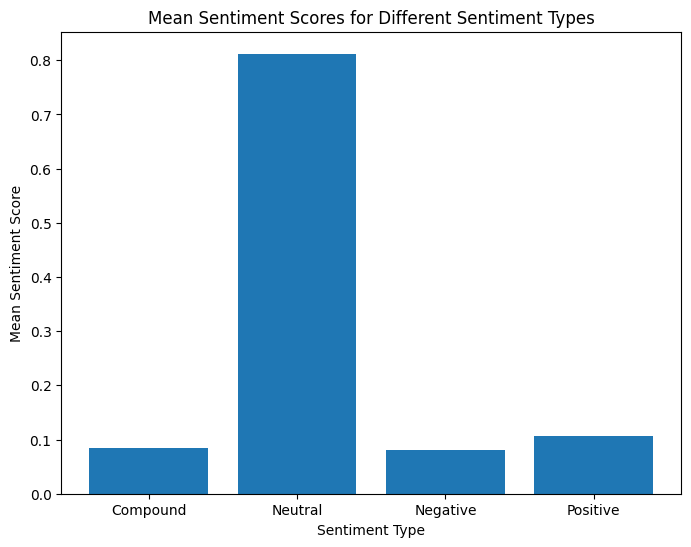

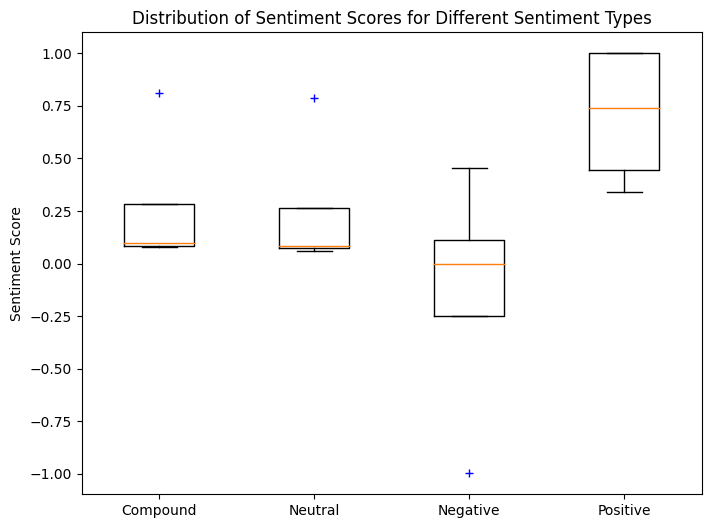

In [11]:
import matplotlib.pyplot as plt

# Data for visualization
sentiment_labels = ['Compound', 'Neutral', 'Negative', 'Positive']
count = [1000, 1000, 1000, 1000]
mean = [0.085025, 0.812070, 0.080487, 0.107454]
std = [0.785098, 0.078246, 0.058089, 0.088476]
min_value = [-0.997400, 0.453000, 0.000000, 0.000000]
max_value = [0.999200, 1.000000, 0.338000, 0.479000]

# Create bar plot for mean sentiment scores
plt.figure(figsize=(8, 6))
plt.bar(sentiment_labels, mean)
plt.xlabel('Sentiment Type')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Scores for Different Sentiment Types')
plt.show()

# Create box plot for sentiment scores distribution
plt.figure(figsize=(8, 6))
plt.boxplot([mean, std, min_value, max_value], labels=sentiment_labels, sym='b+')
plt.ylabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores for Different Sentiment Types')
plt.show()


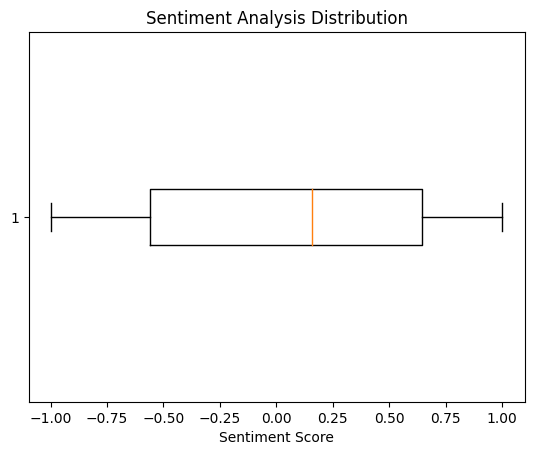

In [13]:
import matplotlib.pyplot as plt

sentiment_data = [0.085025, 0.226300, -0.773375, 0.785098, -0.997400, 0.999200]  # Replace with your sentiment analysis result

# Create a box plot
plt.boxplot(sentiment_data, vert=False)

# Set labels and title
plt.xlabel('Sentiment Score')
plt.title('Sentiment Analysis Distribution')

# Show the plot
plt.show()
